## Handling Images

#### Loading Images

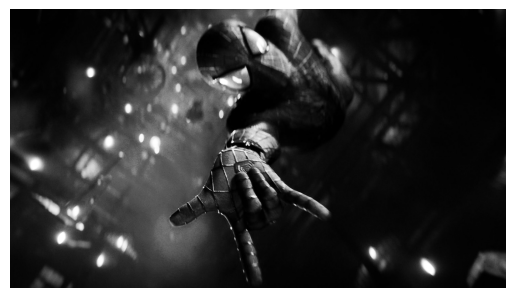

In [7]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("images/test.jpg", cv2.IMREAD_GRAYSCALE)
# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

### Fundamentally, images are data and when we use imread we convert that data into a data type we are very familiar with a NumPy array:

In [8]:
# Show data type
type(image)

numpy.ndarray

In [9]:
image

array([[ 1,  1,  1, ..., 20, 19, 18],
       [ 1,  1,  1, ..., 18, 17, 16],
       [ 1,  1,  1, ..., 17, 16, 16],
       ...,
       [ 5,  5,  5, ...,  1,  1,  1],
       [ 5,  5,  5, ...,  1,  1,  1],
       [ 5,  5,  5, ...,  1,  1,  1]], dtype=uint8)

In [10]:
image.shape

(1406, 2500)

### Top Left corner Intersity

In [11]:
image[0, 0]

1

### In the matrix, each element contains three values corresponding to blue, green, red values (BGR):

In [17]:
# Load image in color
image_bgr = cv2.imread("images/skit.jpg", cv2.IMREAD_COLOR)
b, g, r = image_bgr[0,0]
print('black:', b, 'green: ', g, 'red: ', r)


black: 0 green:  5 red:  112


#### One small caveat: by default OpenCV uses BGR, but many image applications—including Matplotlib—use red, green, blue (RGB), meaning the red and the blue values are swapped. To properly display OpenCV color images in Matplotlib, we need to first convert the color to RGB (apologies to hardcopy readers)

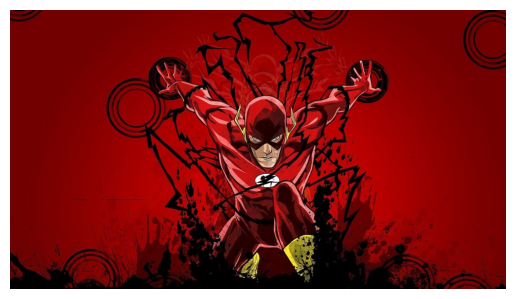

In [18]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

###  Saving Images

In [19]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("images/log.jpg", cv2.IMREAD_GRAYSCALE)
# Save image
cv2.imwrite("images/log_new.jpg", image)

True

### Resizing Images

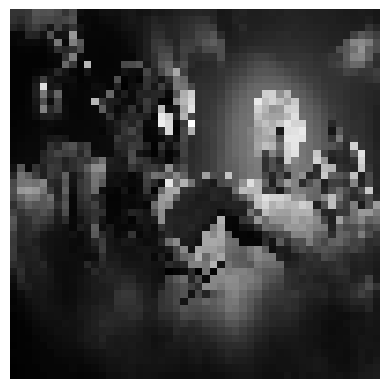

In [21]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("images/tetx.jpg", cv2.IMREAD_GRAYSCALE)
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))
# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

#### Cropping Images

In [28]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image in grayscale
image = cv2.imread("images/test.jpg", cv2.IMREAD_GRAYSCALE)
# Select first half of the columns and all rows
image_cropped = image[:,:128]
image_cropped

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [ 5,  5,  5, ..., 43, 43, 43],
       [ 5,  5,  5, ..., 42, 43, 43],
       [ 5,  5,  5, ..., 42, 42, 43]], dtype=uint8)

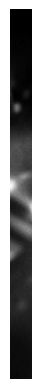

In [27]:
# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

####  Blurring Images

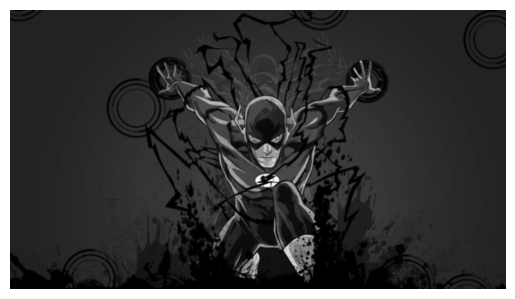

In [31]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("images/skit.jpg", cv2.IMREAD_GRAYSCALE)
# Blur image
image_blurry = cv2.blur(image, (5,5))
# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

### To highlight the effect of kernel size, here is the same blurring with a 100 × 100 kernel:

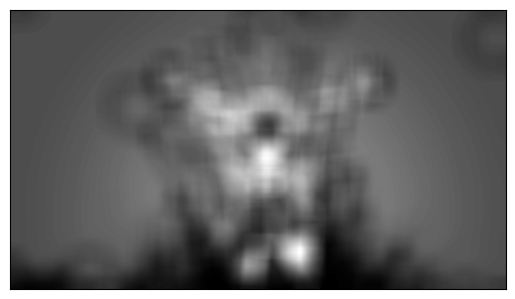

In [32]:
# Blur image
image_very_blurry = cv2.blur(image, (100,100))
# Show image
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

In [33]:
# Create kernel
kernel = np.ones((5,5)) / 25.0
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

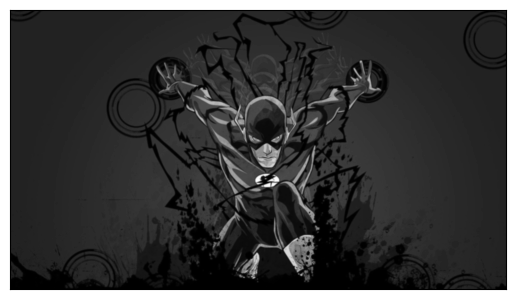

In [34]:
# Apply kernel
image_kernel = cv2.filter2D(image, -1, kernel)
# Show image
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

### Sharpening Images

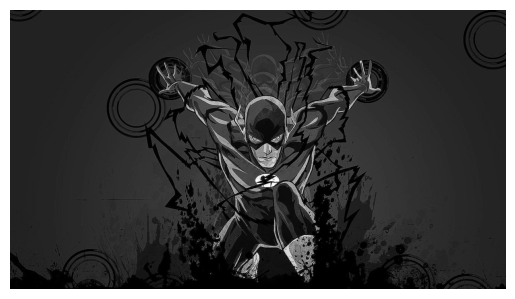

In [37]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image = cv2.imread("images/skit.jpg", cv2.IMREAD_GRAYSCALE)
# Create kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)
# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

### Enhancing Contrast

#### Histogram equalization is a tool for image processing that can make objects and shapes stand out. When we have a grayscale image, we can apply OpenCV’s equalizeHist directly on the image:

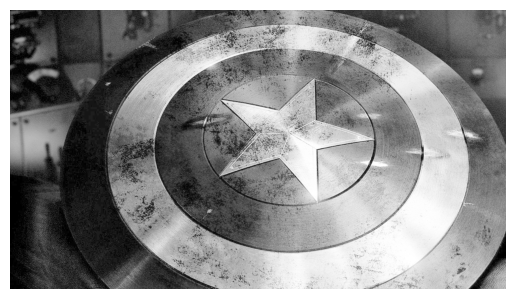

In [39]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image
image = cv2.imread("images/log.jpg", cv2.IMREAD_GRAYSCALE)
# Enhance image
image_enhanced = cv2.equalizeHist(image)
# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

#### However, when we have a color image, we first need to convert the image to the YUV color format. The Y is the luma, or brightness, and U and V denote the color. After the conversion, we can apply equalizeHist to the image and then convert it back to BGR or RGB:

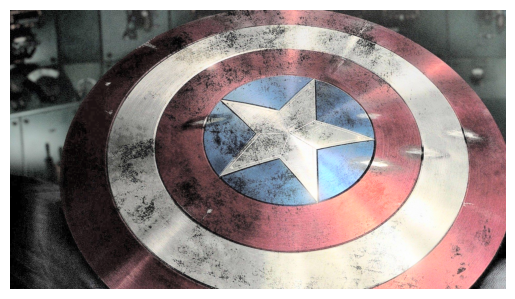

In [41]:
# Load image
image_bgr = cv2.imread("images/log.jpg")
# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Binarizing Images

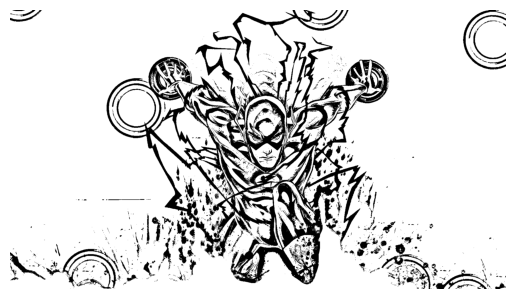

In [43]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image_grey = cv2.imread("images/skit.jpg", cv2.IMREAD_GRAYSCALE)
# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
max_output_value,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY,
neighborhood_size,
subtract_from_mean)
# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

### 

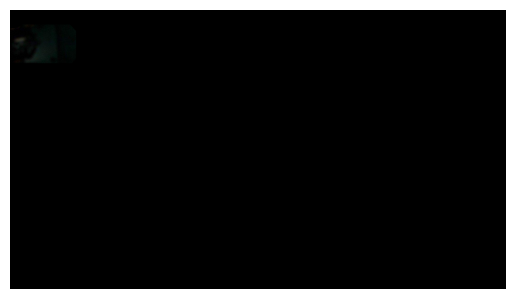

In [45]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image and convert to RGB
image_bgr = cv2.imread('images/log.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150)
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)
# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
# Run grabCut
cv2.grabCut(image_rgb, # Our image
mask, # The Mask
rectangle, # Our rectangle
bgdModel, # Temporary array for background
fgdModel, # Temporary array for background
5, # Number of iterations
cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

### Detecting Edges

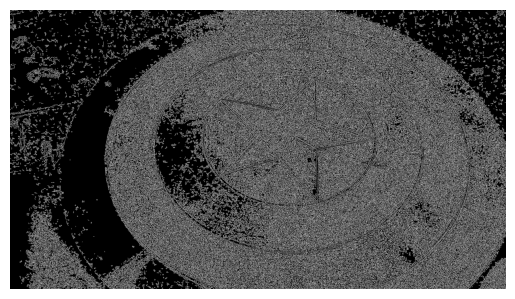

In [46]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image_gray = cv2.imread("images/log.jpg", cv2.IMREAD_GRAYSCALE)# Calculate median intensity
median_intensity = np.median(image_gray)
# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

### Detecting Corners

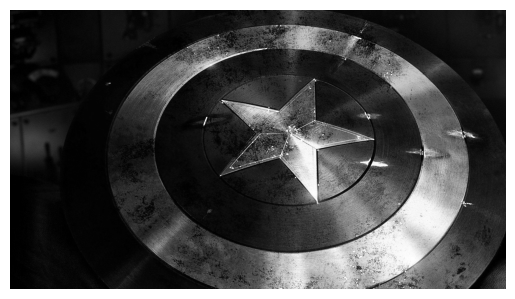

In [48]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image_bgr = cv2.imread("images/log.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)
# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04
# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
block_size,
aperture,
free_parameter)
# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)
# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses >
threshold *
detector_responses.max()] = [255,255,255]
# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()